<a href="https://colab.research.google.com/github/hamzarabi3/animeGANv2_testing/blob/main/Animegan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load models

In [17]:
! pip install torchvision Pillow >/dev/null

In [19]:
import os, glob
import matplotlib.pyplot as plt
from PIL import Image
import torch 

In [1]:
model0 = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="celeba_distill")
model1 = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v1")
model2 = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2")
model3 = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="paprika")
models=[model0,model1,model2,model3]

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main
Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


In [4]:
face2paint = torch.hub.load(
    'bryandlee/animegan2-pytorch:main', 'face2paint', 
    size=512, device="cpu"
)

Using cache found in /root/.cache/torch/hub/bryandlee_animegan2-pytorch_main


## Drop images in content 

In [13]:
images=glob.glob('/content/*.jpg')

In [14]:
images

['/content/Muhammad-Ali.jpg', '/content/rolling_stones.jpg']

In [15]:
newpath='/content/output'
if not os.path.exists(newpath):
  os.makedirs(newpath) #create a folder to save resuls

## Generate and save

In [16]:
x=0
results=[]
for path in images:
  img = Image.open(path).convert("RGB")
  outs= [face2paint(model, img) for model in models]
  results.append(outs)
  i=0
  for out in outs:
    out.save(f'/content/output/{x}_{i}.jpg')
    i+=1
  x+=1

## Show results

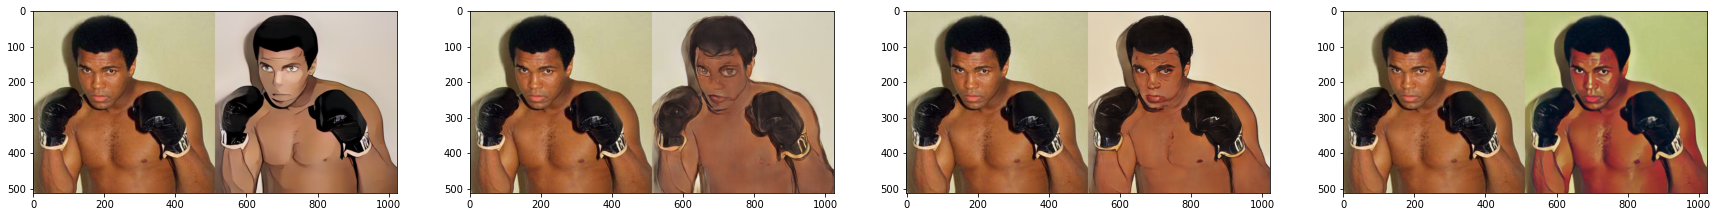

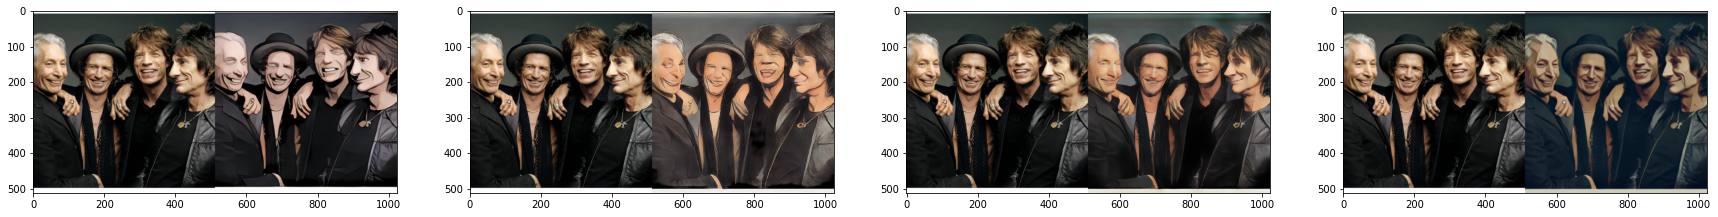

In [20]:
for image_results in results:
  fig, axes=plt.subplots(nrows=1,ncols=len(image_results))
  i=0
  for model_result in image_results:
    axes[i].imshow(model_result)
    i+=1
  fig.set_figheight(15)
  fig.set_figwidth(30)
  fig.show();